## 1. Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [3]:
df=pd.read_csv('diabetes.csv')

## 3. Exploratory Data Analysis

### a. understanding dataset

Head of the dataset

Shape of the data set

Types of columns

Information about data set

Summary of the data set

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


CONCLUSION :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

### b. Data cleaning

Dropping duplicate values

Checking NULL values

Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood

Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(768, 9)

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
#check 0 values

print('Glucose',df[df['Glucose']==0].shape[0])
print('BloodPressure',df[df['BloodPressure']==0].shape[0])
print('SkinThickness',df[df['SkinThickness']==0].shape[0])
print('Insulin',df[df['Insulin']==0].shape[0])
print('BMI',df[df['BMI']==0].shape[0])
print('Age',df[df['Age']==0].shape[0])

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
Age 0


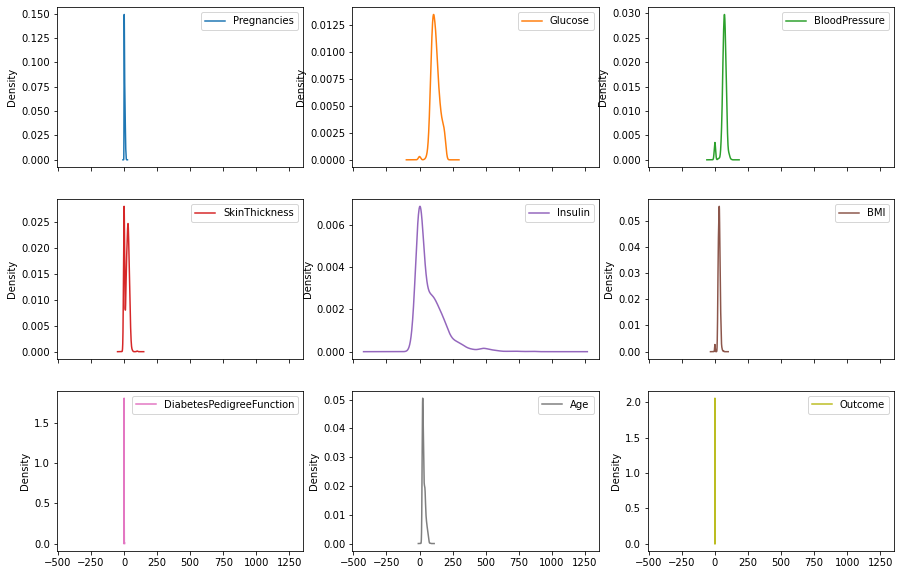

In [34]:
df.plot(kind='density',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

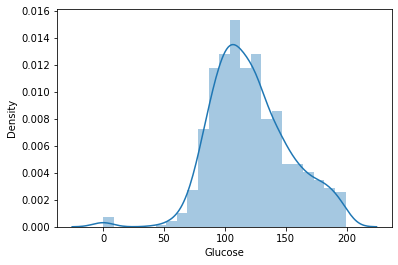

In [35]:
sns.distplot(df['Glucose'])

In [38]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

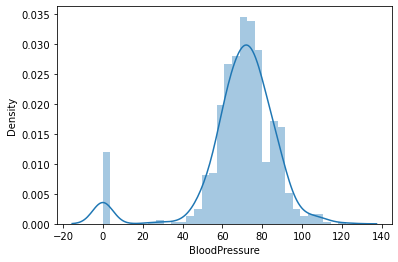

In [39]:
sns.distplot(df['BloodPressure'])

In [40]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

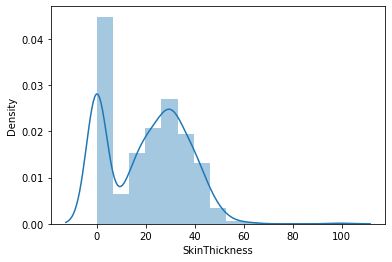

In [42]:
sns.distplot(df['SkinThickness'])

In [43]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

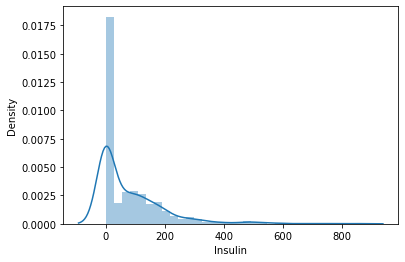

In [44]:
sns.distplot(df['Insulin'])

In [45]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

<AxesSubplot:xlabel='BMI', ylabel='Density'>

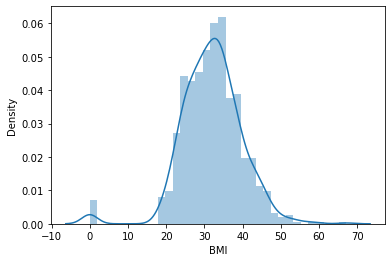

In [46]:
sns.distplot(df['BMI'])

In [50]:
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

## 4. Visualisation

Here we are going to plot :-
    
Count Plot :- to see if the dataset is balanced or not
    
Histograms :- to see if data is normally distributed or skewed
    
Box Plot :- to analyse the distribution and see the outliers
    
Scatter plots :- to understand relationship between any two variables
    
Pair plot :- to create scatter plot between all the variables

<AxesSubplot:xlabel='Outcome', ylabel='count'>

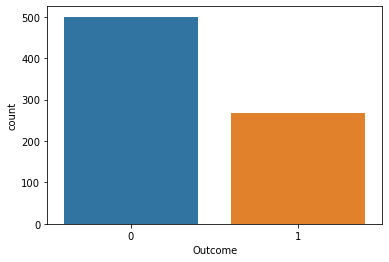

In [52]:
sns.countplot(df['Outcome'])

Conclusion :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

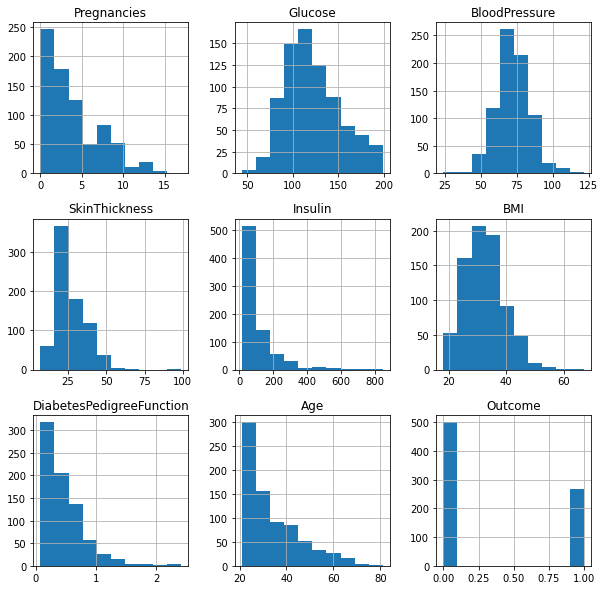

In [53]:
#histogram for each feature

df.hist(bins=10,figsize=(10,10))
plt.show()

Conclusion :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

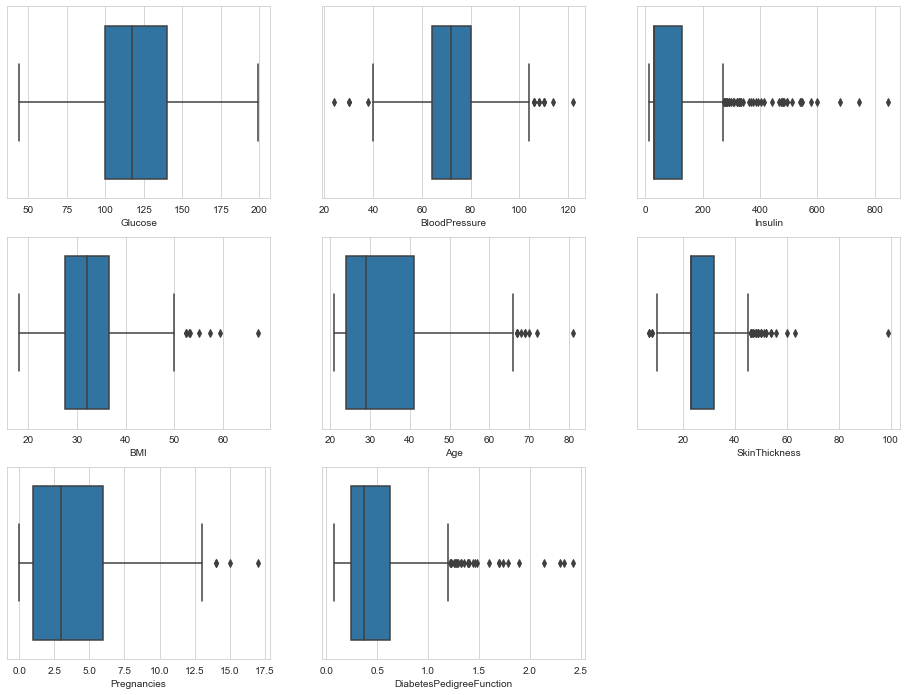

In [79]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
sns.boxplot(df['Glucose'])
plt.subplot(3,3,2)
sns.boxplot(df['BloodPressure'])
plt.subplot(3,3,3)
sns.boxplot(df['Insulin'])
plt.subplot(3,3,4)
sns.boxplot(df['BMI'])
plt.subplot(3,3,5)
sns.boxplot(df['Age'])
plt.subplot(3,3,6)
sns.boxplot(df['SkinThickness'])
plt.subplot(3,3,7)
sns.boxplot(df['Pregnancies'])
plt.subplot(3,3,8)
sns.boxplot(df['DiabetesPedigreeFunction'])

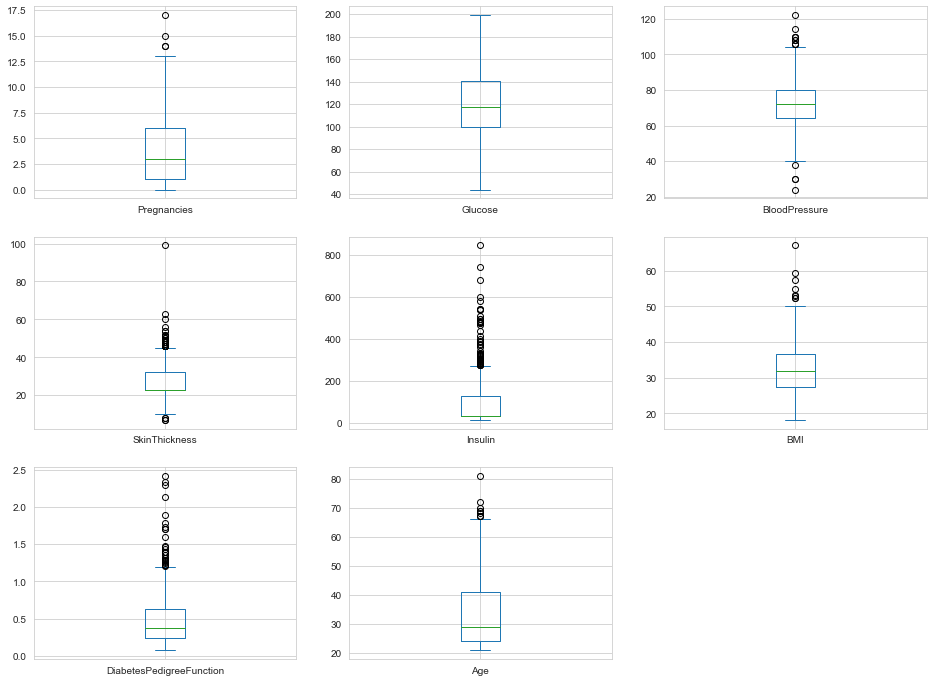

In [76]:
df.drop('Outcome',axis=1).plot(kind='box',figsize=(16,12),subplots=True,layout=(3,3))
plt.show()

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

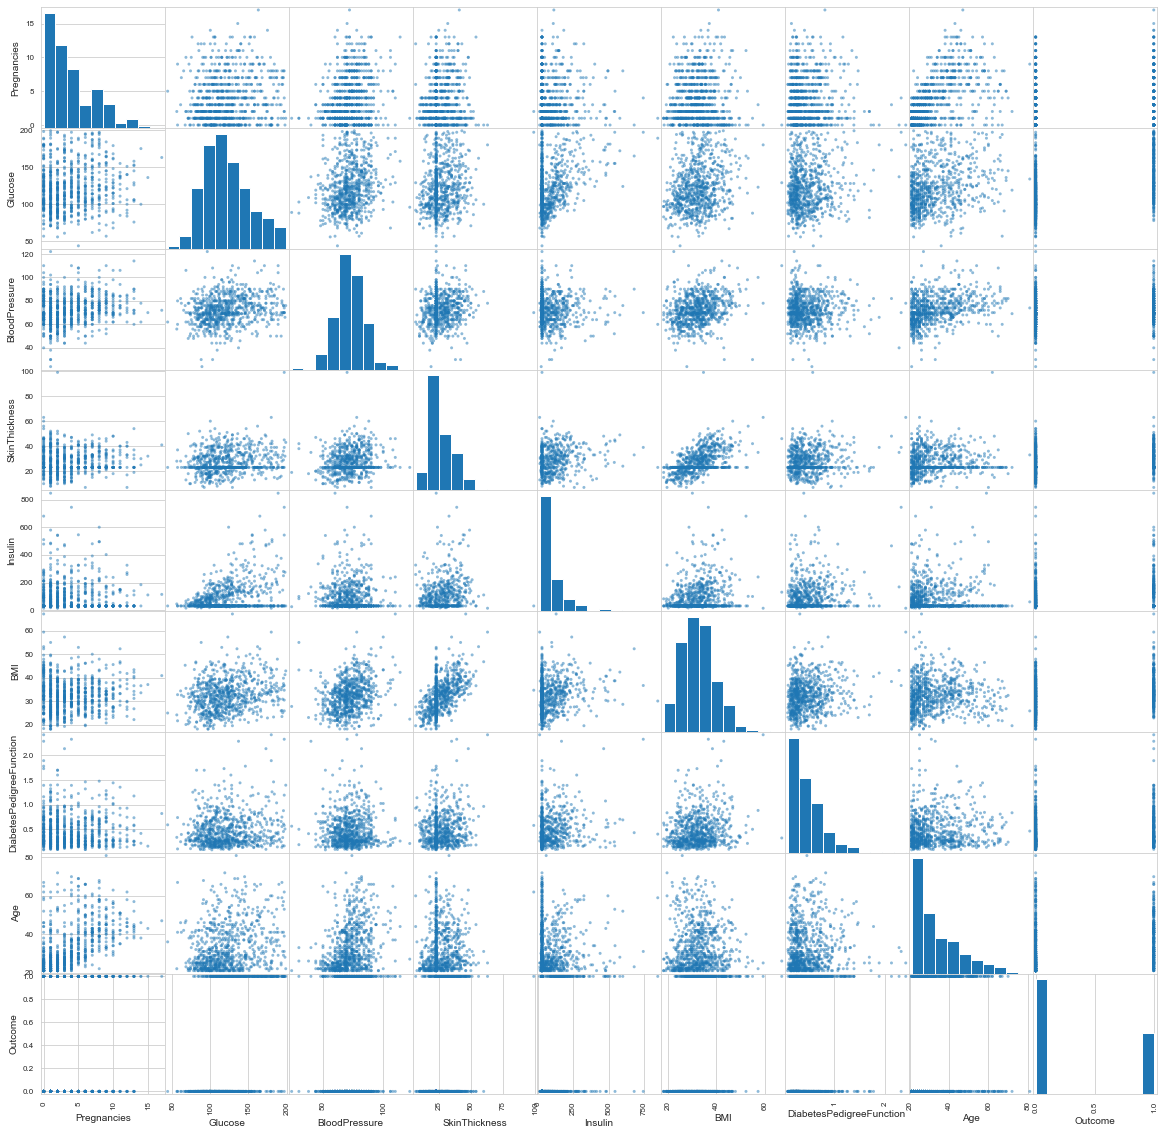

In [83]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(20,20))

plt.show()

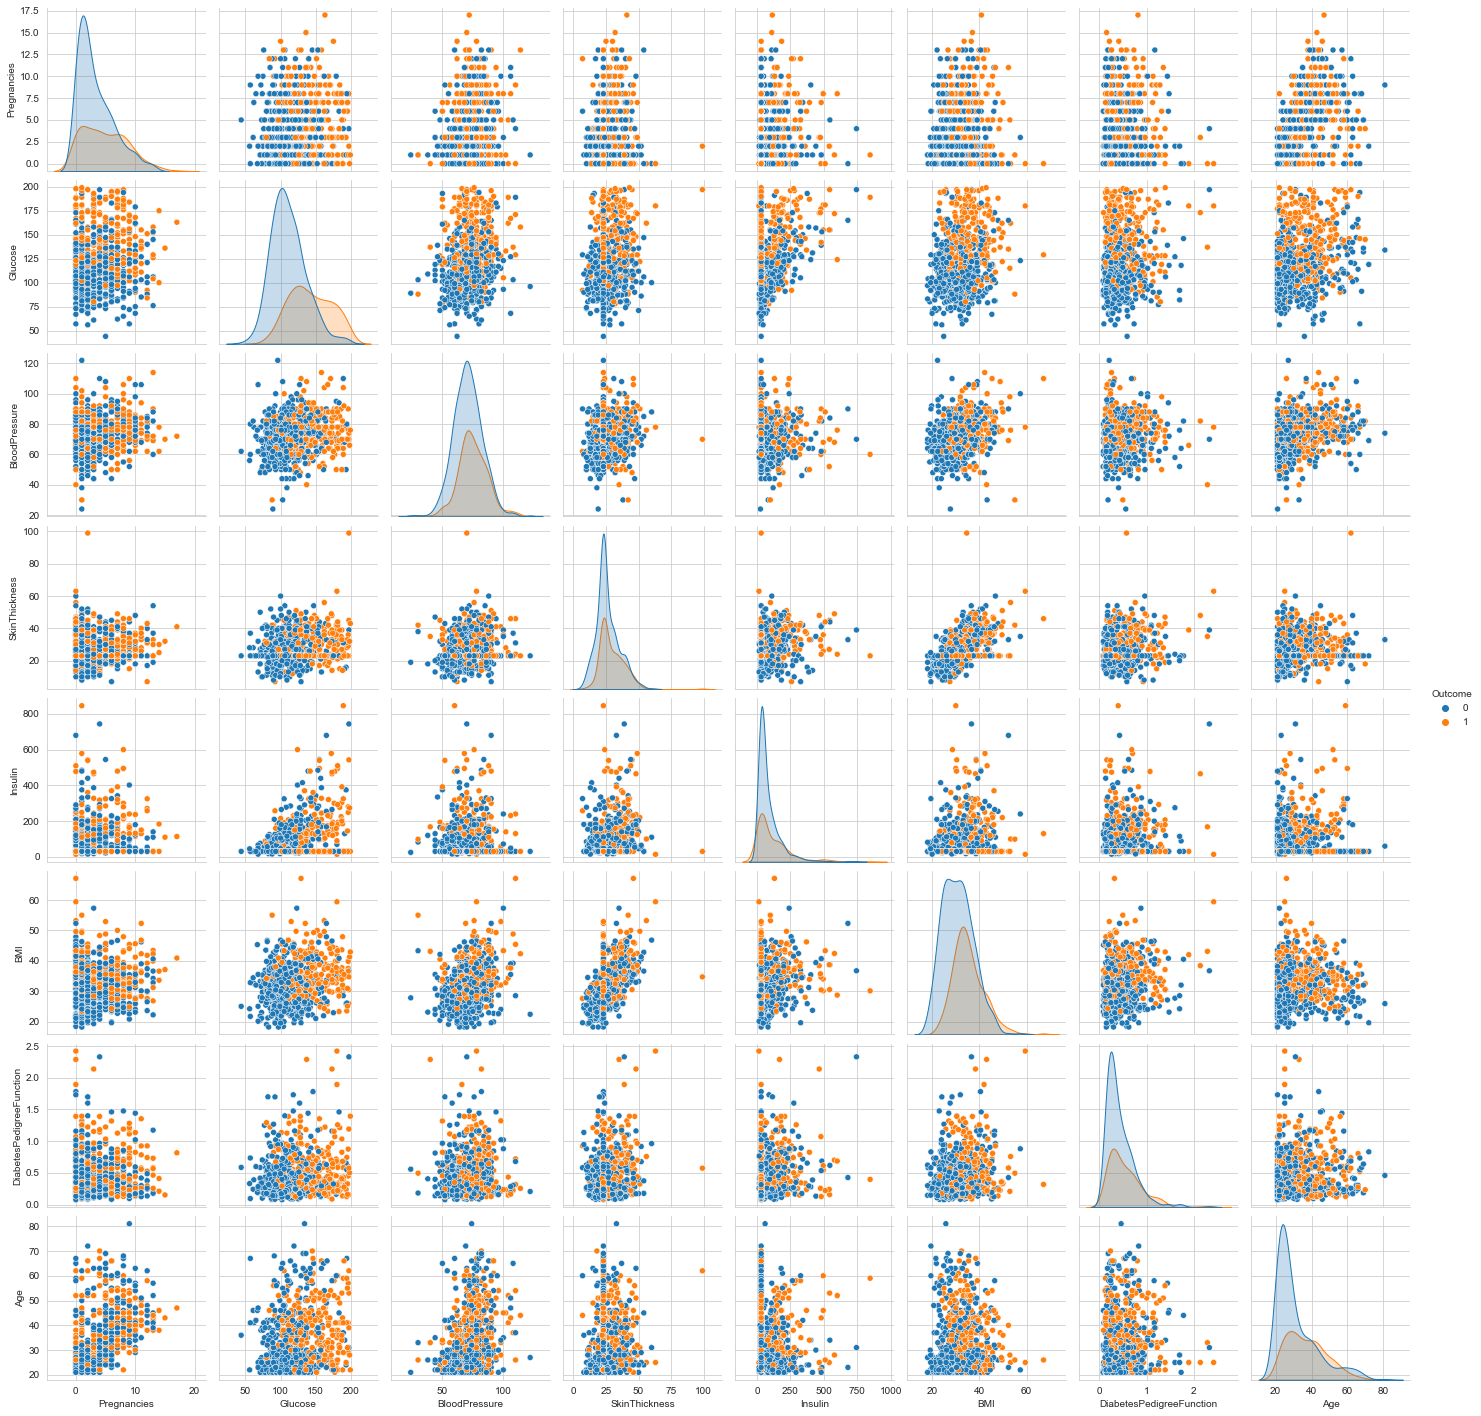

In [85]:
sns.pairplot(df,hue='Outcome')

## 5. Feature Selection

<AxesSubplot:>

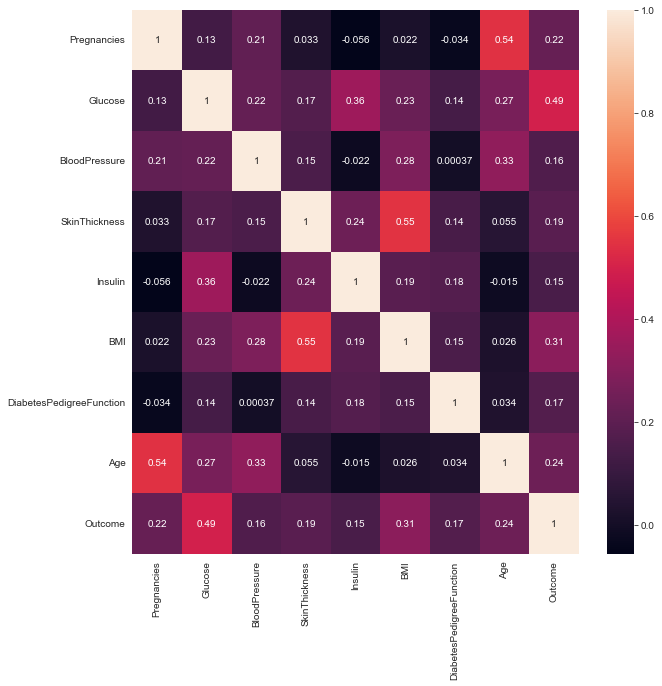

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

CONCLUSION :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them

In [92]:
df_select=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis=1)

## 6.Handling outliers

In [95]:
from sklearn.preprocessing import QuantileTransformer

x=df_select

quantile=QuantileTransformer()

X=quantile.fit_transform(x)

df_new=quantile.transform(X)

df_new=pd.DataFrame(X)

df_new.columns=['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']

df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


Pregnancies         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
SkinThickness    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
BMI                 AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age              AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Outcome          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

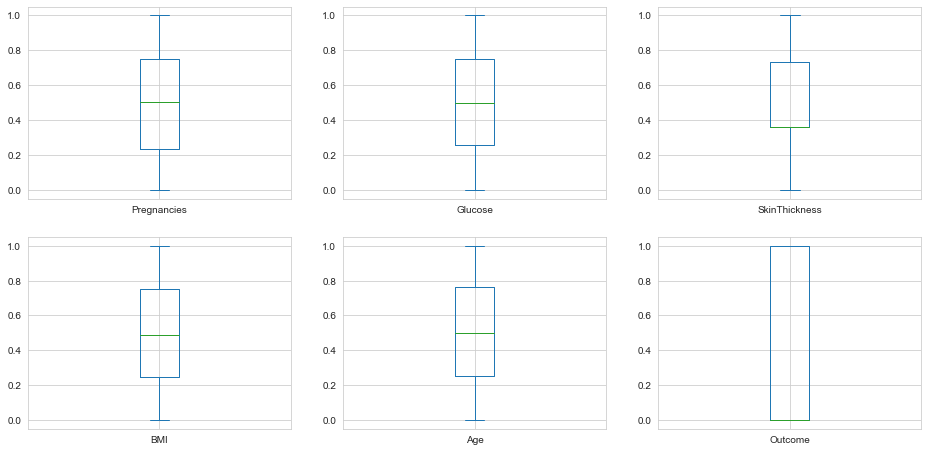

In [99]:
df_new.plot(kind='box',subplots=True,figsize=(16,12),layout=(3,3))

## 5. Split dataset

In [101]:
x=df_new.drop('Outcome',axis=1)
y=df_new['Outcome']

In [102]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=33)

In [107]:
x_train.shape,y_train.shape

((614, 5), (614,))

In [108]:
x_test.shape,y_test.shape

((154, 5), (154,))

## 6. Classification Algorithms 

KNN

Naive Bayes

SVM

Decision Tree

Random Forest

Logistic Regression

##### a. KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [110]:
knn=KNeighborsClassifier()

n_neighbors=list(range(15,25))

p=[1,2]

weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

hyperparameters=dict(n_neighbors=n_neighbors,p=p,weights=weights,metric=metric)

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

grid_search=GridSearchCV(estimator=knn,param_grid=hyperparameters,n_jobs=-1,cv=cv,scoring='f1',error_score=0)

In [111]:
best_model=grid_search.fit(x_train,y_train)

In [112]:
best_model.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19, p=1)

In [113]:
knn_pred=best_model.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       100
         1.0       0.77      0.56      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.78      0.79      0.78       154


 F1:
 0.6451612903225806

 Precision score is:
 0.7692307692307693

 Recall score is:
 0.5555555555555556

 Confusion Matrix:



<AxesSubplot:>

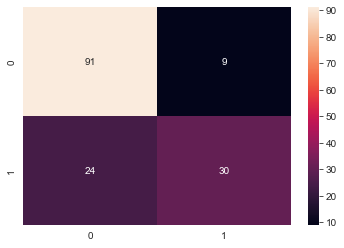

In [115]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)